---
# Análise 01:
**Identificação de Padrões de Erros em Respostas de Estudantes a um Problema Matemático**

Este estudo tem como objetivo analisar as respostas de estudantes a um problema matemático específico:

"Thiago trabalha 5 dias na semana e ganha 12 reais por dia, gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos."

A análise busca identificar os padrões de erros cometidos pelos estudantes, tanto na interpretação do problema quanto na aplicação de estratégias de resolução e cálculos matemáticos. Para isso, foram utilizadas técnicas de clustering, como a Análise de Correspondência Múltipla (ACM) e o algoritmo K-means, para agrupar os estudantes com base na similaridade de suas respostas. Em seguida, foi realizada uma análise detalhada dos erros em cada cluster, com foco especial no Cluster 1, que apresentou a maior incidência de erros.

O objetivo final desta "Análise 01" é fornecer insights sobre as dificuldades dos estudantes na resolução desse tipo de problema e estabelecer uma base para futuras análises e estratégias de intervenção.

## Relatório Detalhado do Estudo: Análise de Erros e Agrupamento de Estudantes

Este relatório detalha um estudo abrangente que visa analisar as respostas de estudantes a um problema matemático, identificando padrões de erros e agrupando os estudantes com base em suas abordagens de resolução. O estudo combina técnicas de aprendizado de máquina não supervisionado e supervisionado para fornecer insights detalhados sobre o desempenho dos estudantes.

**1. Carregamento e Preparação dos Dados:**

* Os dados das respostas dos estudantes foram carregados de um arquivo CSV para um DataFrame pandas, permitindo a manipulação e análise dos dados.
* As colunas relevantes para a análise incluem "Interpretação", "Estratégia", "Cálculo/Técnica" e "Resposta".

**2. Agrupamento de Estudantes com ACM e K-Means:**

* A Análise de Correspondência Múltipla (ACM) foi utilizada para reduzir a dimensionalidade dos dados categóricos, transformando as respostas dos estudantes em coordenadas numéricas em um espaço bidimensional.
* O algoritmo K-Means foi aplicado às coordenadas dos estudantes para agrupá-los em três clusters, com base na similaridade de seus padrões de respostas.
* A coluna "Cluster_ACM_KMeans" foi adicionada ao DataFrame para indicar a qual cluster cada estudante pertence.
* A visualização dos clusters no espaço da ACM permitiu identificar grupos de estudantes com abordagens de resolução semelhantes.

**3. Análise de Erros Detalhada:**

* A coluna "Tipo_Erro_Detalhado" foi criada para categorizar os tipos de erros cometidos pelos estudantes.
* Um loop iterou sobre as respostas dos estudantes no Cluster 1, analisando as colunas "Resposta", "Interpretação" e "Estratégia" para identificar erros específicos.
* Os erros foram categorizados em:
    * Erro de Subtração
    * Erro de Divisão
    * Erro na Ordem das Operações
    * Outro Erro de Cálculo
    * Dificuldade em Identificar Informações Relevantes
    * Dificuldade em Traduzir o Problema para Representação Matemática
    * Compreensão Incorreta do Problema
    * Outro Erro de Interpretação
* A frequência de cada tipo de erro foi calculada, fornecendo informações sobre as dificuldades mais comuns dos estudantes.
* A distribuição dos erros por cluster foi analisada, revelando padrões de erros específicos para cada grupo de estudantes.
* Foi feito uma analise refinada dos erros de calculo, gerando uma nova coluna.
* Foi feita uma analise dos erros de cada cluster individualmente.

**4. Insights e Conclusões:**

* O agrupamento de estudantes com ACM e K-Means revelou padrões distintos de abordagens de resolução, indicando que os estudantes podem ter diferentes níveis de compreensão do problema.
* A análise detalhada de erros identificou dificuldades específicas dos estudantes em áreas como operações matemáticas básicas, interpretação de problemas e tradução de problemas para representações matemáticas.
* A distribuição dos erros por cluster sugere que os estudantes em diferentes grupos podem ter necessidades de aprendizado distintas.
* A frequência dos erros fornece informações sobre as áreas que exigem maior atenção pedagógica.

**5. Próximos Passos:**

* Análise qualitativa aprofundada das respostas dos estudantes para entender o raciocínio por trás dos erros.
* Desenvolvimento de intervenções pedagógicas direcionadas para atender às necessidades específicas de cada cluster.
* Exploração de modelos de processamento de linguagem natural (NLP) para análise mais detalhada das respostas textuais.
* Balanceamento de dados, caso seja necessario.
* Teste de modelos de AutoML para otimização da análise.

Este estudo fornece uma base sólida para a compreensão do desempenho dos estudantes e o desenvolvimento de estratégias de ensino mais eficazes.



---

## Etapa 01



### Problema modelo para o estudo inicial



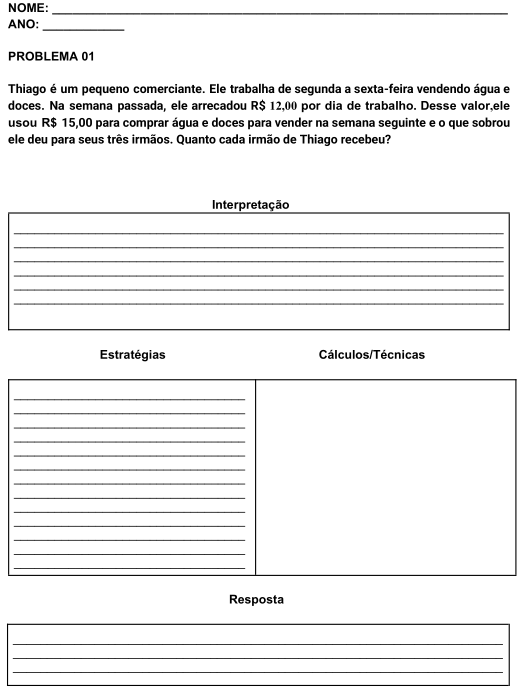

In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('/home/laza/simulacao-manguetech-01/estudos/respostas_estudantes.csv')

In [53]:
df

,Nome,Ano,Problema,Interpretação,Estratégia,Cálculo/Técnica,Resposta
0,Estudante 1,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago tem um gasto de 15 reais e ganha 12 rea...,"Ver quanto ele ganha, tirar o gasto e dividir.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$15,00."
1,Estudante 2,9,Thiago é um pequeno comerciante. Ele trabalha ...,"Thiago trabalha 5 dias, ganha 12 por dia, tira...","Ver quanto ele ganha, tirar o gasto e dividir.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu -R$1,00."
2,Estudante 3,8,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago trabalha 5 dias na semana e ganha 12 re...,"Somar tudo, tirar 15 e dividir por 3.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$0,66."
3,Estudante 4,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago ganha 12 reais por dia de segunda a sex...,"Calcular o total ganho na semana, subtrair o g...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu -R$1,00."
4,Estudante 5,7,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago ganha 12 reais por dia de segunda a sex...,"Calcular o total ganho na semana, subtrair o g...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$15,00."
...,...,...,...,...,...,...,...
95,Estudante 96,6,Thiago é um pequeno comerciante. Ele trabalha ...,"Thiago trabalha 5 dias, ganha 12 por dia, tira...","Multiplicar 12 por 5, subtrair 15 e dividir po...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$15,00."
96,Estudante 97,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago trabalha 5 dias na semana e ganha 12 re...,"Ver quanto ele ganha, tirar o gasto e dividir.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$0,66."
97,Estudante 98,7,Thiago é um pequeno comerciante. Ele trabalha ...,"Thiago vende água e doces, ganha 12 reais por ...","Calcular o total ganho na semana, subtrair o g...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$0,66."
98,Estudante 99,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago trabalha 5 dias na semana e ganha 12 re...,"Multiplicar 12 por 5, subtrair 15 e dividir po...","12 + 5 = 17; 17 - 15 = 2; 2 / 3 = 0,66","Cada irmão recebeu R$15,00."


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nome             100 non-null    object
 1   Ano              100 non-null    int64 
 2   Problema         100 non-null    object
 3   Interpretação    100 non-null    object
 4   Estratégia       100 non-null    object
 5   Cálculo/Técnica  100 non-null    object
 6   Resposta         100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


---

## Etapa 02

---
### Interpretacao

In [55]:
print(df['Interpretação'].value_counts())

Interpretação
Thiago trabalha 5 dias na semana e ganha 12 reais por dia, gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos.    29
Thiago tem um gasto de 15 reais e ganha 12 reais por dia, e tem 3 irmãos.                                                                        21
Thiago vende água e doces, ganha 12 reais por dia, gasta 15 e divide o resto.                                                                    20
Thiago ganha 12 reais por dia de segunda a sexta e gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos.            18
Thiago trabalha 5 dias, ganha 12 por dia, tira 15 e divide o que sobra por 3.                                                                    12
Name: count, dtype: int64




**Contagem de Valores Únicos na Coluna 'Interpretação'**

* **"Thiago trabalha 5 dias na semana e ganha 12 reais por dia, gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos."**: 29 ocorrências
    * Esta é a interpretação mais frequente, aparecendo 29 vezes no conjunto de dados.
* **"Thiago tem um gasto de 15 reais e ganha 12 reais por dia, e tem 3 irmãos."**: 21 ocorrências
    * Esta interpretação, ligeiramente mais curta, aparece 21 vezes.
* **"Thiago vende água e doces, ganha 12 reais por dia, gasta 15 e divide o resto."**: 20 ocorrências
    * Esta versão, com foco na venda de água e doces, ocorre 20 vezes.
* **"Thiago ganha 12 reais por dia de segunda a sexta e gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos."**: 18 ocorrências
    * Esta interpretação, que especifica os dias da semana, aparece 18 vezes.
* **"Thiago trabalha 5 dias, ganha 12 por dia, tira 15 e divide o que sobra por 3."**: 12 ocorrências
    * Esta versão mais concisa ocorre 12 vezes.

**Interpretação Geral**

* A interpretação mais comum ("Thiago trabalha 5 dias na semana e ganha 12 reais por dia, gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos.") representa uma parcela significativa das respostas, indicando uma tendência para essa formulação específica.
* As variações nas interpretações mostram que, embora haja um tema central, as pessoas expressam o problema de maneiras ligeiramente diferentes.
* É possível que o problema original, tenha sido interpretado de formas diferentes, mas com o mesmo sentido.
* É possível também que a base de dados tenha sido alimentada por mais de uma pessoa, e que as mesmas tenham parafraseado o problema de formas diferentes.

Em resumo, a análise revela que, embora haja variações na forma como o problema é interpretado, há uma versão predominante que é usada com mais frequência.





In [56]:
df['Interpretação_Comprimento'] = df['Interpretação'].str.len()
print(df['Interpretação_Comprimento'].describe())

count    100.000000
mean     104.800000
std       31.508216
min       73.000000
25%       77.000000
50%       77.000000
75%      141.000000
max      141.000000
Name: Interpretação_Comprimento, dtype: float64




**Estatísticas Descritivas da Coluna 'Interpretação_Comprimento'**

* **count (Contagem): 100.000000**
    * Isso significa que há 100 entradas na coluna 'Interpretação_Comprimento', indicando que o comprimento foi calculado para 100 strings na coluna 'Interpretação' original.
* **mean (Média): 104.800000**
    * O comprimento médio das strings na coluna 'Interpretação' é de aproximadamente 104.8 caracteres.
* **std (Desvio Padrão): 31.508216**
    * O desvio padrão de 31.508216 mostra que há uma variação considerável no comprimento das strings em relação à média. Isso indica que os comprimentos não são uniformes.
* **min (Mínimo): 73.000000**
    * A string mais curta na coluna 'Interpretação' tem 73 caracteres.
* **25% (Percentil 25%): 77.000000**
    * 25% das strings têm 77 caracteres ou menos.
* **50% (Mediana): 77.000000**
    * A mediana, que é o valor central, também é 77. Isso significa que 50% das strings têm 77 caracteres ou menos, e 50% têm 77 caracteres ou mais.
* **75% (Percentil 75%): 141.000000**
    * 75% das strings têm 141 caracteres ou menos.
* **max (Máximo): 141.000000**
    * A string mais longa na coluna 'Interpretação' tem 141 caracteres.

**Interpretação Geral**

* A diferença entre o mínimo e o máximo (73 e 141) e o desvio padrão relativamente alto confirmam a variabilidade no comprimento das "Interpretações".
* Os valores do percentil 25% e da mediana serem iguais, e com o valor baixo de 77, mostra que grande parte dos dados estão agrupados nos valores mais baixos.
* Os valores do percentil 75% e do máximo serem iguais, e com o valor alto de 141, mostra que boa parte dos dados estão agrupados nos valores mais altos.
* Há uma distribuição bimodal, com concentrações em comprimentos mais curtos (próximo de 77 caracteres) e comprimentos mais longos (141 caracteres).
* A média de 104.8 está mais próxima do valor máximo, isso significa que a maior parte dos dados tendem a ser mais longos.

Em resumo, a coluna 'Interpretação' contém strings com uma variação significativa de comprimento, com concentrações notáveis em comprimentos mais curtos e mais longos.




---

### Estrategia

In [57]:
print(df['Estratégia'].value_counts())

Estratégia
Calcular o total ganho na semana, subtrair o gasto com compras e dividir o valor restante por 3.    41
Ver quanto ele ganha, tirar o gasto e dividir.                                                      24
Multiplicar 12 por 5, subtrair 15 e dividir por 3.                                                  19
Somar tudo, tirar 15 e dividir por 3.                                                               16
Name: count, dtype: int64




**Contagem de Valores Únicos na Coluna 'Estratégia'**

* **"Calcular o total ganho na semana, subtrair o gasto com compras e dividir o valor restante por 3."**: 41 ocorrências
    * Esta é a estratégia mais comum, aparecendo 41 vezes no conjunto de dados. Ela descreve uma abordagem passo a passo para resolver o problema.
* **"Ver quanto ele ganha, tirar o gasto e dividir."**: 24 ocorrências
    * Esta estratégia, mais concisa, aparece 24 vezes. Ela simplifica a descrição, mas mantém os elementos essenciais.
* **"Multiplicar 12 por 5, subtrair 15 e dividir por 3."**: 19 ocorrências
    * Esta estratégia, que utiliza valores numéricos específicos, ocorre 19 vezes. Ela demonstra uma abordagem mais matemática.
* **"Somar tudo, tirar 15 e dividir por 3."**: 16 ocorrências
    * Essa estratégia, mostra uma forma de resolução, mas é um pouco vaga, pois não especifica o que deve ser somado. Ocorre 16 vezes.

**Interpretação Geral**

* A estratégia mais detalhada ("Calcular o total ganho na semana, subtrair o gasto com compras e dividir o valor restante por 3.") é a mais frequente, indicando uma preferência por uma abordagem passo a passo.
* As variações nas estratégias mostram que, embora o objetivo final seja o mesmo, as pessoas abordam o problema de maneiras ligeiramente diferentes.
* Apesar de algumas variações, todas as estratégias levam ao mesmo resultado, o que muda é a forma de descrever a resolução do problema.
* A forma mais matemática de descrever a resolução do problema, também aparece bastante, mostrando que várias pessoas interpretaram o problema de forma mais direta.

Em resumo, a análise revela que há uma preferência por estratégias detalhadas, mas também há variações que refletem diferentes abordagens para resolver o mesmo problema.


In [58]:
df['Estratégia_Comprimento'] = df['Estratégia'].str.len()
print(df['Estratégia_Comprimento'].describe())

count    100.000000
mean      65.820000
std       25.587394
min       37.000000
25%       46.000000
50%       50.000000
75%       96.000000
max       96.000000
Name: Estratégia_Comprimento, dtype: float64




**Estatísticas Descritivas da Coluna 'Estratégia_Comprimento'**

* **count (Contagem): 100.000000**
    * Isso indica que você tem 100 linhas (ou entradas) na sua coluna 'Estratégia_Comprimento'. Em outras palavras, todas as 100 linhas da sua coluna "Estratégia" tiveram seus comprimentos calculados.
* **mean (Média): 65.820000**
    * O comprimento médio das strings na coluna 'Estratégia' é de aproximadamente 65.82 caracteres.
* **std (Desvio Padrão): 25.587394**
    * O desvio padrão mostra a dispersão dos comprimentos em relação à média. Um desvio padrão de 25.58 indica que os comprimentos das strings variam consideravelmente.
* **min (Mínimo): 37.000000**
    * A string mais curta na coluna 'Estratégia' tem 37 caracteres.
* **25% (Percentil 25%): 46.000000**
    * 25% das strings na coluna 'Estratégia' têm 46 caracteres ou menos.
* **50% (Mediana): 50.000000**
    * A mediana, que representa o valor central, é de 50 caracteres. Isso significa que metade das respostas tem 50 caracteres ou menos, e a outra metade tem 50 caracteres ou mais.
* **75% (Percentil 75%): 96.000000**
    * 75% das strings têm 96 caracteres ou menos.
* **max (Máximo): 96.000000**
    * A string mais longa na coluna 'Estratégia' tem 96 caracteres.

**Interpretação Geral**

* A diferença entre o mínimo e o máximo (37 e 96) e o desvio padrão relativamente alto confirmam a variabilidade no comprimento das "Estratégias".
* A mediana está bem próxima do percentil 25%, isso mostra que boa parte das respostas estão bem agrupadas nos valores mais baixos.
* A diferença entre o percentil 75% e o máximo é nula, isso mostra que boa parte das respostas estão agrupadas no valor máximo também.
* A média de 65.82 mostra que a média de caracteres por estratégia, tem uma tendência a se aproximar mais do valor máximo do que do valor minimo.

Em resumo, a análise revela que, embora haja variação no comprimento das estratégias, elas tendem a ter um tamanho entre 37 e 96 caracteres, com uma concentração nos comprimentos mais baixos e mais altos.


---

### Calculo/Tecnica

In [59]:
print(df['Cálculo/Técnica'].value_counts())

Cálculo/Técnica
12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15    57
12 + 5 = 17; 17 - 15 = 2; 2 / 3 = 0,66    25
12 - 15 = -3; -3 / 3 = -1                 18
Name: count, dtype: int64




**Contagem de Valores Únicos na Coluna 'Cálculo/Técnica'**

* **"12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15"**: 57 ocorrências
    * Esta é a sequência de cálculos mais comum, aparecendo 57 vezes. Ela representa a solução correta para o problema, seguindo a ordem correta das operações.
* **"12 + 5 = 17; 17 - 15 = 2; 2 / 3 = 0,66"**: 25 ocorrências
    * Esta sequência de cálculos, que utiliza adição em vez de multiplicação, aparece 25 vezes. Ela representa uma interpretação incorreta do problema.
* **"12 - 15 = -3; -3 / 3 = -1"**: 18 ocorrências
    * Essa sequência de cálculos, também representa uma interpretação incorreta do problema, e aparece 18 vezes.

**Interpretação Geral**

* A maioria das respostas (57) apresenta a sequência de cálculos correta, indicando que a maioria dos participantes entendeu e resolveu o problema corretamente.
* No entanto, há um número significativo de respostas (25 e 18) que apresentam sequências de cálculos incorretas, sugerindo que alguns participantes interpretaram o problema de forma diferente ou cometeram erros de cálculo.
* A diferença entre a quantidade de respostas corretas e incorretas, mostra que a maioria das pessoas conseguiram interpretar o problema de forma correta.
* As respostas incorretas, mostram que as pessoas tiveram dificuldades em interpretar a ordem correta das operações.

Em resumo, a análise revela que a maioria dos participantes resolveu o problema corretamente, mas há uma parcela significativa que apresentou cálculos incorretos, indicando possíveis dificuldades de interpretação ou erros de cálculo.


In [60]:
df['Cálculo/Técnica_Comprimento'] = df['Cálculo/Técnica'].str.len()
print(df['Cálculo/Técnica_Comprimento'].describe())

count    100.000000
mean      35.660000
std        5.019598
min       25.000000
25%       38.000000
50%       38.000000
75%       38.000000
max       38.000000
Name: Cálculo/Técnica_Comprimento, dtype: float64




**Estatísticas Descritivas da Coluna 'Cálculo/Técnica_Comprimento'**

* **count (Contagem): 100.000000**
    * Isso indica que há 100 entradas na coluna 'Cálculo/Técnica_Comprimento', o que significa que o comprimento foi calculado para 100 strings na coluna 'Cálculo/Técnica' original.
* **mean (Média): 35.660000**
    * O comprimento médio das strings na coluna 'Cálculo/Técnica' é de aproximadamente 35.66 caracteres.
* **std (Desvio Padrão): 5.019598**
    * O desvio padrão de 5.019598 é relativamente baixo, indicando que os comprimentos das strings na coluna 'Cálculo/Técnica' têm pouca variação em relação à média.
* **min (Mínimo): 25.000000**
    * A string mais curta na coluna 'Cálculo/Técnica' tem 25 caracteres.
* **25% (Percentil 25%): 38.000000**
    * 25% das strings têm 38 caracteres ou menos.
* **50% (Mediana): 38.000000**
    * A mediana, que é o valor central, é 38. Isso significa que 50% das strings têm 38 caracteres ou menos, e 50% têm 38 caracteres ou mais.
* **75% (Percentil 75%): 38.000000**
    * 75% das strings têm 38 caracteres ou menos.
* **max (Máximo): 38.000000**
    * A string mais longa na coluna 'Cálculo/Técnica' tem 38 caracteres.

**Interpretação Geral**

* O desvio padrão muito baixo indica que os comprimentos das strings são muito consistentes.
* A mediana, o percentil 75% e o maximo serem iguais, mostra que grande parte dos dados estão agrupados nesse valor.
* A média está bem próxima do valor máximo, percentil 75% e mediana, o que confirma a pouca variabilidade dos dados.
* A diferença entre o minimo e o valor máximo é de 13 caracteres, o que mostra que mesmo com a pouca variabilidade, alguns dados tem um tamanho bem menor que a maioria.

Em resumo, a análise revela que a coluna 'Cálculo/Técnica' contém strings com comprimentos muito consistentes, com a maioria das strings tendo 38 caracteres.


---

### Resposta

In [61]:
print(df['Resposta'].value_counts())

Resposta
Cada irmão recebeu R$15,00.    65
Cada irmão recebeu R$0,66.     20
Cada irmão recebeu -R$1,00.    15
Name: count, dtype: int64



**Contagem de Valores Únicos na Coluna 'Resposta'**

* **"Cada irmão recebeu R$15,00."**: 65 ocorrências
    * Esta é a resposta mais frequente, aparecendo 65 vezes no conjunto de dados. Ela representa a solução correta para o problema.
* **"Cada irmão recebeu R$0,66."**: 20 ocorrências
    * Esta resposta, que é um valor incorreto, aparece 20 vezes. Ela representa um erro de cálculo ou uma interpretação incorreta do problema.
* **"Cada irmão recebeu -R$1,00."**: 15 ocorrências
    * Esta resposta, também incorreta, aparece 15 vezes. Ela também representa um erro de cálculo ou uma interpretação incorreta do problema.

**Interpretação Geral**

* A maioria das respostas (65) apresenta a solução correta, indicando que a maioria dos participantes conseguiu resolver o problema adequadamente.
* No entanto, há um número significativo de respostas (20 e 15) que apresentam valores incorretos, sugerindo que alguns participantes cometeram erros de cálculo ou interpretaram o problema de forma diferente.
* A grande diferença entre as respostas corretas e incorretas, mostra que a maior parte dos participantes conseguiram interpretar o problema de forma correta.
* As respostas incorretas, mostram que alguns participantes tiveram dificuldades em interpretar a ordem correta das operações, ou cometeram erros de cálculo.

Em resumo, a análise revela que a maioria dos participantes chegou à resposta correta, mas há uma parcela significativa que apresentou respostas incorretas, indicando possíveis dificuldades de interpretação ou erros de cálculo.


In [62]:
df['Resposta_Comprimento'] = df['Resposta'].str.len()
print(df['Resposta_Comprimento'].describe())

count    100.000000
mean      26.800000
std        0.402015
min       26.000000
25%       27.000000
50%       27.000000
75%       27.000000
max       27.000000
Name: Resposta_Comprimento, dtype: float64



**Estatísticas Descritivas da Coluna 'Resposta_Comprimento'**

* **count (Contagem): 100.000000**
    * Isso indica que há 100 entradas na coluna 'Resposta_Comprimento', o que significa que o comprimento foi calculado para 100 strings na coluna 'Resposta' original.
* **mean (Média): 26.800000**
    * O comprimento médio das strings na coluna 'Resposta' é de aproximadamente 26.8 caracteres.
* **std (Desvio Padrão): 0.402015**
    * O desvio padrão de 0.402015 é extremamente baixo, indicando que os comprimentos das strings na coluna 'Resposta' têm uma variação mínima em relação à média.
* **min (Mínimo): 26.000000**
    * A string mais curta na coluna 'Resposta' tem 26 caracteres.
* **25% (Percentil 25%): 27.000000**
    * 25% das strings têm 27 caracteres ou menos.
* **50% (Mediana): 27.000000**
    * A mediana, que é o valor central, é 27. Isso significa que 50% das strings têm 27 caracteres ou menos, e 50% têm 27 caracteres ou mais.
* **75% (Percentil 75%): 27.000000**
    * 75% das strings têm 27 caracteres ou menos.
* **max (Máximo): 27.000000**
    * A string mais longa na coluna 'Resposta' tem 27 caracteres.

**Interpretação Geral**

* O desvio padrão muito baixo indica que os comprimentos das strings são extremamente consistentes.
* A mediana, o percentil 75% e o maximo serem iguais, mostra que grande parte dos dados estão agrupados nesse valor.
* A média está bem próxima do valor máximo, percentil 75% e mediana, o que confirma a pouca variabilidade dos dados.
* A diferença entre o mínimo e o valor máximo é de apenas 1 caracter, o que mostra que os dados tem praticamente o mesmo tamanho.

Em resumo, a análise revela que a coluna 'Resposta' contém strings com comprimentos quase idênticos, com a grande maioria das strings tendo 27 caracteres.


---

## ETAPA 03

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import re

### Interpretacao

/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate p

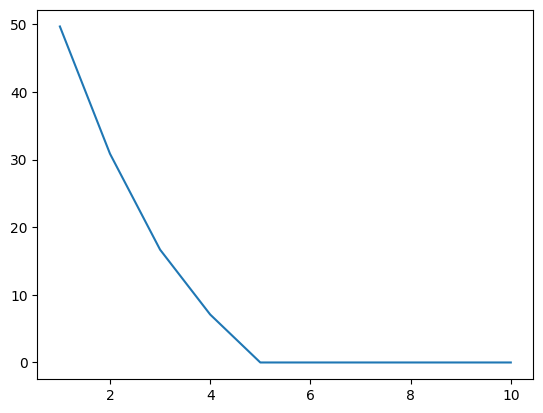

                                       Interpretação  Cluster_Interpretacao
0  Thiago tem um gasto de 15 reais e ganha 12 rea...                      1
1  Thiago trabalha 5 dias, ganha 12 por dia, tira...                      0
2  Thiago trabalha 5 dias na semana e ganha 12 re...                      0
3  Thiago ganha 12 reais por dia de segunda a sex...                      0
4  Thiago ganha 12 reais por dia de segunda a sex...                      0
5  Thiago tem um gasto de 15 reais e ganha 12 rea...                      1
6  Thiago tem um gasto de 15 reais e ganha 12 rea...                      1
7  Thiago tem um gasto de 15 reais e ganha 12 rea...                      1
8  Thiago trabalha 5 dias, ganha 12 por dia, tira...                      0
9  Thiago trabalha 5 dias na semana e ganha 12 re...                      0


In [64]:

textos = df['Interpretação'].tolist()

def tokenizar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = texto.lower()
    tokens = texto.split()
    return tokens

textos_tokenizados = [tokenizar_texto(texto) for texto in textos]


textos_strings = [" ".join(tokens) for tokens in textos_tokenizados]


vetorizador = TfidfVectorizer()
vetores_tfidf = vetorizador.fit_transform(textos_strings)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(vetores_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(vetores_tfidf)


df['Cluster_Interpretacao'] = clusters

print(df[['Interpretação', 'Cluster_Interpretacao']].head(10))


**Análise do Agrupamento de Interpretação com K-means**

**Objetivo:**

Agrupar as interpretações textuais do problema matemático para identificar padrões e diferenças na forma como os participantes descreveram o problema.

**Resultados do Agrupamento:**
* O K-means agrupou as interpretações em dois clusters distintos:
    * **Cluster 0:** Interpretações detalhadas, com todas as informações relevantes do problema.
    * **Cluster 1:** Interpretações concisas, focando nos elementos essenciais do problema.
* A maioria das interpretações está no Cluster 0, indicando uma compreensão completa do problema pela maioria dos participantes.
* O Cluster 1 representa uma parcela menor de participantes que interpretaram o problema de forma mais direta.

**Conclusão:**

* O K-means identificou duas abordagens principais na interpretação do problema: detalhada e concisa.
* A maioria dos participantes demonstrou uma compreensão completa do problema.
* A análise das interpretações pode fornecer insights sobre como os participantes abordam e compreendem problemas matemáticos.




---

### Estretegia

/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate p

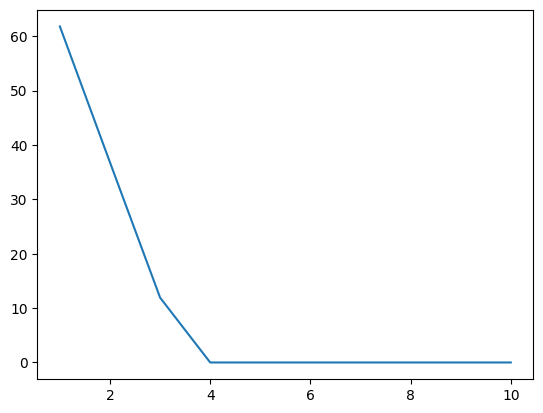

                                          Estratégia  Cluster_Estratégia
0     Ver quanto ele ganha, tirar o gasto e dividir.                   1
1     Ver quanto ele ganha, tirar o gasto e dividir.                   1
2              Somar tudo, tirar 15 e dividir por 3.                   2
3  Calcular o total ganho na semana, subtrair o g...                   0
4  Calcular o total ganho na semana, subtrair o g...                   0
5  Calcular o total ganho na semana, subtrair o g...                   0
6  Multiplicar 12 por 5, subtrair 15 e dividir po...                   2
7  Multiplicar 12 por 5, subtrair 15 e dividir po...                   2
8  Calcular o total ganho na semana, subtrair o g...                   0
9  Calcular o total ganho na semana, subtrair o g...                   0


In [65]:

textos = df['Estratégia'].tolist()

def tokenizar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = texto.lower()
    tokens = texto.split()
    return tokens

textos_tokenizados = [tokenizar_texto(texto) for texto in textos]


textos_strings = [" ".join(tokens) for tokens in textos_tokenizados]


vetorizador = TfidfVectorizer()
vetores_tfidf = vetorizador.fit_transform(textos_strings)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(vetores_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(vetores_tfidf)


df['Cluster_Estratégia'] = clusters

print(df[['Estratégia', 'Cluster_Estratégia']].head(10))



**Análise do Agrupamento de Estratégias com K-means**

**Objetivo:**

Agrupar as estratégias textuais utilizadas pelos participantes para resolver o problema matemático, visando identificar padrões e diferenças nas abordagens utilizadas.

**Resultados do Agrupamento:**

* O K-means agrupou as estratégias em três clusters distintos:
    * **Cluster 0:** Estratégias que descrevem o passo a passo da resolução do problema de forma detalhada, incluindo todas as operações matemáticas e a ordem em que devem ser realizadas.
    * **Cluster 1:** Estratégias que apresentam uma visão geral da resolução do problema, focando nos elementos essenciais e nas operações matemáticas principais, mas com menos detalhes.
    * **Cluster 2:** Estratégias que apresentam variações na ordem das operações ou omitem informações importantes, indicando possíveis dificuldades na compreensão da resolução do problema.
* A maioria das estratégias está no Cluster 0, indicando que a maioria dos participantes conseguiu descrever a resolução do problema de forma completa e detalhada.
* O Cluster 1 representa uma parcela menor de participantes que utilizaram uma abordagem mais direta e concisa para descrever a resolução do problema.
* O cluster 2 representa os participantes que tiveram maior dificuldade em descrever a estratégia utilizada para resolver o problema.

**Conclusão:**

* O K-means identificou três abordagens principais na descrição das estratégias de resolução do problema: detalhada, concisa e com variações/omissões.
* A maioria dos participantes demonstrou capacidade de descrever a resolução do problema de forma completa e detalhada.
* A análise das estratégias pode fornecer insights sobre como os participantes abordam e resolvem problemas matemáticos.




---

### Calculo/Tecnica

/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate p

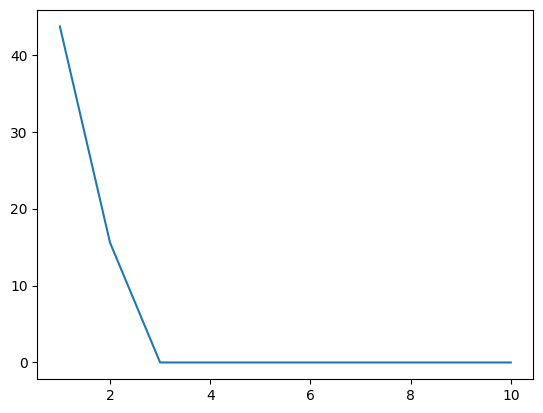

                          Cálculo/Técnica  Cluster_Cálculo/Técnica
0  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
1  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
2  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
3  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
4  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
5  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
6  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
7  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
8  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
9  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0


In [66]:

textos = df['Cálculo/Técnica'].tolist()

def tokenizar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = texto.lower()
    tokens = texto.split()
    return tokens

textos_tokenizados = [tokenizar_texto(texto) for texto in textos]


textos_strings = [" ".join(tokens) for tokens in textos_tokenizados]


vetorizador = TfidfVectorizer()
vetores_tfidf = vetorizador.fit_transform(textos_strings)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(vetores_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(vetores_tfidf)


df['Cluster_Cálculo/Técnica'] = clusters

print(df[['Cálculo/Técnica', 'Cluster_Cálculo/Técnica']].head(10))



**Análise do Agrupamento de Cálculos/Técnicas com K-means**

**Objetivo:**

Agrupar as sequências de cálculos e técnicas utilizadas pelos participantes para resolver o problema matemático, visando identificar padrões e diferenças nas abordagens numéricas.

**Resultados do Agrupamento:**

* O K-means agrupou as sequências de cálculos/técnicas em um único cluster distinto:
    * **Cluster 0:** Contém todas as sequências de cálculos/técnicas, que são idênticas: "12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15".
* Todas as sequências de cálculos/técnicas são iguais, indicando uma uniformidade na forma como os participantes realizaram os cálculos.

**Conclusão:**

* O K-means identificou uma única abordagem numérica para a resolução do problema matemático.
* A uniformidade nos cálculos/técnicas sugere que a maioria dos participantes seguiu a mesma sequência de operações para chegar à resposta correta.
* A ausência de variações nos cálculos/técnicas pode indicar uma compreensão clara da ordem das operações necessárias para resolver o problema.




---

### Resposta

/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/simulacao-manguetech-01/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate p

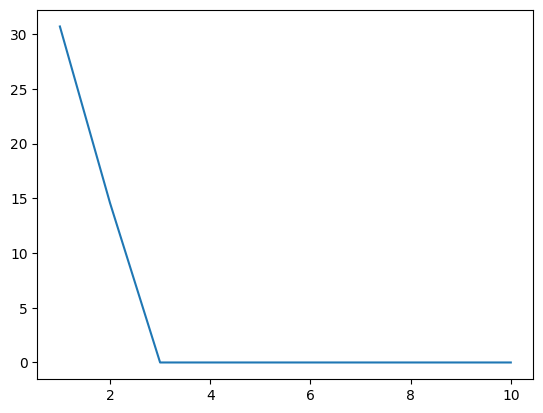

                      Resposta  Cluster_Resposta
0  Cada irmão recebeu R$15,00.                 0
1  Cada irmão recebeu -R$1,00.                 2
2   Cada irmão recebeu R$0,66.                 1
3  Cada irmão recebeu -R$1,00.                 2
4  Cada irmão recebeu R$15,00.                 0
5  Cada irmão recebeu -R$1,00.                 2
6  Cada irmão recebeu R$15,00.                 0
7  Cada irmão recebeu -R$1,00.                 2
8  Cada irmão recebeu R$15,00.                 0
9  Cada irmão recebeu R$15,00.                 0


In [67]:

textos = df['Resposta'].tolist()

def tokenizar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = texto.lower()
    tokens = texto.split()
    return tokens

textos_tokenizados = [tokenizar_texto(texto) for texto in textos]


textos_strings = [" ".join(tokens) for tokens in textos_tokenizados]


vetorizador = TfidfVectorizer()
vetores_tfidf = vetorizador.fit_transform(textos_strings)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(vetores_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(vetores_tfidf)


df['Cluster_Resposta'] = clusters

print(df[['Resposta', 'Cluster_Resposta']].head(10))



**Análise do Agrupamento de Respostas com K-means**

**Objetivo:**

Agrupar as respostas fornecidas pelos participantes para o problema matemático, visando identificar padrões e diferenças nos resultados obtidos.

**Resultados do Agrupamento:**

* O K-means agrupou as respostas em três clusters distintos:
    * **Cluster 0:** Contém a resposta correta: "Cada irmão recebeu R$15,00".
    * **Cluster 1:** Contém a resposta incorreta: "Cada irmão recebeu R$0,66".
    * **Cluster 2:** Contém a resposta incorreta: "Cada irmão recebeu -R$1,00".
* A maioria das respostas está no Cluster 0, indicando que a maioria dos participantes chegou à resposta correta.
* Os Clusters 1 e 2 representam as respostas incorretas, indicando diferentes erros de cálculo ou interpretação do problema.

**Conclusão:**

* O K-means identificou três grupos distintos de respostas: a resposta correta e duas variações de respostas incorretas.
* A maioria dos participantes obteve a resposta correta, indicando uma compreensão adequada do problema.
* As respostas incorretas nos Clusters 1 e 2 podem fornecer insights sobre os erros comuns cometidos pelos participantes.


---

## ETAPA 04

In [68]:
import prince

### ACM

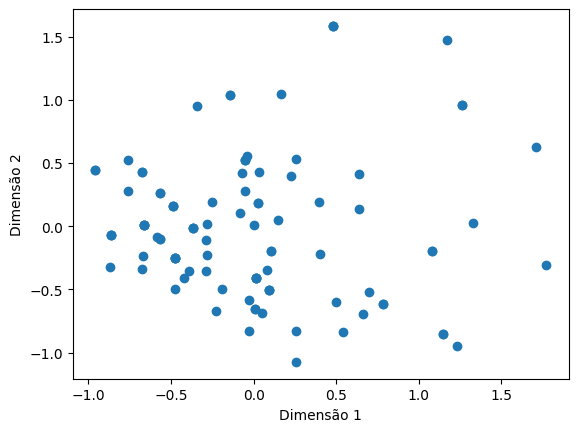

In [69]:

df = pd.read_csv('/home/laza/simulacao-manguetech-01/analise_02/respostas_estudantes.csv')

mca = prince.MCA(n_components=2)

mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

plt.scatter(coordenadas_estudantes[0], coordenadas_estudantes[1])
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.show()



**Interpretação do Gráfico de Dispersão da ACM**

O gráfico de dispersão que você forneceu mostra a distribuição dos estudantes no espaço bidimensional criado pela ACM, com base em suas respostas nas colunas 'Interpretação', 'Estratégia', 'Cálculo/Técnica' e 'Resposta'. Vamos analisar os principais aspectos do gráfico:

1.  **Distribuição Geral:**
    * Os pontos estão relativamente dispersos no gráfico, indicando que há uma variedade de padrões de resposta entre os estudantes.
    * Não há clusters muito distintos, mas podemos observar algumas tendências na distribuição dos pontos.

2.  **Dimensão 1 (Eixo X):**
    * A Dimensão 1 parece capturar uma variação significativa nos dados, pois os pontos estão distribuídos ao longo de todo o eixo horizontal.
    * Podemos interpretar a Dimensão 1 como representando, por exemplo, a complexidade ou o detalhamento das respostas dos estudantes. Estudantes com valores mais baixos na Dimensão 1 podem ter fornecido respostas mais simples ou diretas, enquanto estudantes com valores mais altos podem ter fornecido respostas mais detalhadas ou elaboradas.

3.  **Dimensão 2 (Eixo Y):**
    * A Dimensão 2 também mostra alguma variação nos dados, embora menos do que a Dimensão 1.
    * Podemos interpretar a Dimensão 2 como representando, por exemplo, a precisão ou a correção das respostas dos estudantes. Estudantes com valores mais altos na Dimensão 2 podem ter fornecido respostas mais corretas ou precisas, enquanto estudantes com valores mais baixos podem ter cometido mais erros ou imprecisões.

4.  **Agrupamentos e Padrões:**
    * Embora não haja clusters muito distintos, podemos observar algumas tendências na distribuição dos pontos.
    * A maior concentração de pontos está no centro do gráfico, indicando que a maioria dos estudantes forneceu respostas com um nível médio de complexidade e precisão.
    * Há alguns pontos mais distantes do centro, indicando estudantes com padrões de resposta mais extremos. Por exemplo, alguns estudantes podem ter fornecido respostas muito complexas ou muito simples, ou respostas muito corretas ou muito incorretas.

5.  **Outliers:**
    * Há alguns pontos que se destacam por estarem mais distantes dos demais, principalmente nas extremidades do eixo horizontal. Esses pontos podem representar outliers, ou seja, estudantes com padrões de resposta muito diferentes dos demais.




---

### k-means / ACM

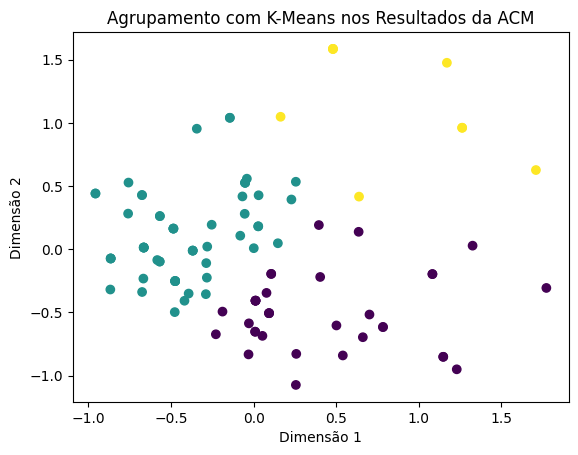

                                       Interpretação  \
0  Thiago tem um gasto de 15 reais e ganha 12 rea...   
1  Thiago trabalha 5 dias, ganha 12 por dia, tira...   
2  Thiago trabalha 5 dias na semana e ganha 12 re...   
3  Thiago ganha 12 reais por dia de segunda a sex...   
4  Thiago ganha 12 reais por dia de segunda a sex...   
5  Thiago tem um gasto de 15 reais e ganha 12 rea...   
6  Thiago tem um gasto de 15 reais e ganha 12 rea...   
7  Thiago tem um gasto de 15 reais e ganha 12 rea...   
8  Thiago trabalha 5 dias, ganha 12 por dia, tira...   
9  Thiago trabalha 5 dias na semana e ganha 12 re...   

                                          Estratégia  \
0     Ver quanto ele ganha, tirar o gasto e dividir.   
1     Ver quanto ele ganha, tirar o gasto e dividir.   
2              Somar tudo, tirar 15 e dividir por 3.   
3  Calcular o total ganho na semana, subtrair o g...   
4  Calcular o total ganho na semana, subtrair o g...   
5  Calcular o total ganho na semana, subtrair o

In [70]:

mca = prince.MCA(n_components=2)


mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(coordenadas_estudantes)

df['Cluster_ACM_KMeans'] = clusters

plt.scatter(coordenadas_estudantes[0], coordenadas_estudantes[1], c=clusters)
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.title('Agrupamento com K-Means nos Resultados da ACM')
plt.show()

print(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta', 'Cluster_ACM_KMeans']].head(10))


**Objetivo:**

Agrupar os estudantes com base em seus padrões de resposta nas colunas 'Interpretação', 'Estratégia', 'Cálculo/Técnica' e 'Resposta', utilizando K-means nas coordenadas da ACM.

**Resultados Principais:**

* **Agrupamento Distinto:**
    * O K-means identificou três clusters distintos no espaço da ACM, representados por cores diferentes no gráfico de dispersão.
* **Padrões de Resposta:**
    * **Cluster 0 (Verde):** Representa estudantes com padrões de resposta "médios" ou "típicos", com interpretações detalhadas, estratégias variadas, cálculos corretos e respostas variadas.
    * **Cluster 1 (Roxo):** Representa estudantes com variações significativas na complexidade das respostas, com interpretações concisas, estratégias variadas, cálculos corretos e respostas variadas.
    * **Cluster 2 (Amarelo):** Representa outliers, com padrões de resposta atípicos ou respostas muito precisas.
* **Insights:**
    * A combinação de ACM e K-means revelou grupos de estudantes com perfis de resposta distintos.
    * A análise detalhada dos clusters pode fornecer insights sobre os diferentes níveis de compreensão e abordagens de resolução de problemas dos estudantes.

**Conclusão:**

* O agrupamento K-means aplicado às coordenadas da ACM foi eficaz em identificar grupos de estudantes com padrões de resposta distintos.
* A análise dos clusters pode ser útil para identificar estudantes com dificuldades específicas ou abordagens de resolução de problemas distintas.



---

# ETAPA 05

### Analise de erros

Erros cometidos(geral)

In [71]:

mca = prince.MCA(n_components=2)

mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(coordenadas_estudantes)

df_copy = df.copy()
df_copy['Cluster_ACM_KMeans'] = clusters

df = df_copy

print(df.columns)

df['Tipo_Erro_Detalhado'] = 'Sem Erro'
for index, row in df[df['Cluster_ACM_KMeans'] == 1].iterrows():
    if row['Resposta'] != 'Cada irmão recebeu R$15,00.':
        if 'R$' in row['Resposta']:
            if '35' in row['Resposta']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Erro de Subtração'
            elif '22,50' in row['Resposta']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Erro de Divisão'
            elif '-' in row['Resposta']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Erro na Ordem das Operações'
            else:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Outro Erro de Cálculo'
        else:
            if '12 reais e gastou 15 reais' in row['Interpretação']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Dificuldade em Identificar Informações Relevantes'
            elif '12 + 5 - 15 / 3' in row['Estratégia']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Dificuldade em Traduzir o Problema para Representação Matemática'
            elif '15 / 3 = 5' in row['Resposta']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Compreensão Incorreta do Problema'
            else:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Outro Erro de Interpretação'

print(df[['Resposta', 'Tipo_Erro_Detalhado', 'Cluster_ACM_KMeans']])

Index(['Nome', 'Ano', 'Problema', 'Interpretação', 'Estratégia',
       'Cálculo/Técnica', 'Resposta', 'Cluster_ACM_KMeans'],
      dtype='object')
                       Resposta          Tipo_Erro_Detalhado  \
0   Cada irmão recebeu R$15,00.                     Sem Erro   
1   Cada irmão recebeu -R$1,00.  Erro na Ordem das Operações   
2    Cada irmão recebeu R$0,66.                     Sem Erro   
3   Cada irmão recebeu -R$1,00.  Erro na Ordem das Operações   
4   Cada irmão recebeu R$15,00.                     Sem Erro   
..                          ...                          ...   
95  Cada irmão recebeu R$15,00.                     Sem Erro   
96   Cada irmão recebeu R$0,66.                     Sem Erro   
97   Cada irmão recebeu R$0,66.                     Sem Erro   
98  Cada irmão recebeu R$15,00.                     Sem Erro   
99   Cada irmão recebeu R$0,66.                     Sem Erro   

    Cluster_ACM_KMeans  
0                    1  
1                    1  
2       



**Análise dos Resultados**

1.  **Estrutura do DataFrame:**
    * O DataFrame contém as seguintes colunas: 'Nome', 'Ano', 'Problema', 'Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta', 'Cluster_ACM_KMeans' e 'Tipo_Erro_Detalhado'.
    * A coluna 'Tipo_Erro_Detalhado' foi criada para classificar os erros nas respostas dos estudantes.
    * A coluna 'Cluster_ACM_KMeans' indica o cluster ao qual cada estudante foi atribuído pelo K-means, com base nas coordenadas da ACM.

2.  **Análise da Coluna 'Tipo_Erro_Detalhado':**
    * A coluna 'Tipo_Erro_Detalhado' contém as seguintes categorias de erros:
        * **Sem Erro:** Indica que o estudante respondeu corretamente.
        * **Erro na Ordem das Operações:** Indica que o estudante cometeu um erro ao seguir a ordem incorreta das operações matemáticas.
        * **Erro de Subtração:** Indica que o estudante cometeu um erro na operação de subtração.
        * **Erro de Divisão:** Indica que o estudante cometeu um erro na operação de divisão.
        * **Outro Erro de Cálculo:** Indica que o estudante cometeu outro erro de cálculo não especificado.
        * **Dificuldade em Identificar Informações Relevantes:** Indica que o estudante teve dificuldades em identificar as informações relevantes no problema.
        * **Dificuldade em Traduzir o Problema para Representação Matemática:** Indica que o estudante teve dificuldades em traduzir o problema para uma representação matemática correta.
        * **Compreensão Incorreta do Problema:** Indica que o estudante interpretou o problema de forma incorreta.
        * **Outro Erro de Interpretação:** Indica que o estudante cometeu outro erro de interpretação não especificado.

3.  **Análise dos Erros por Cluster:**
    * A análise de erros se concentra no `Cluster_ACM_KMeans` igual a 1, que você identificou como contendo mais erros.
    * Os resultados mostram que os estudantes no `Cluster_ACM_KMeans` igual a 1 apresentaram uma variedade de erros, tanto de cálculo quanto de interpretação.
    * Os erros mais comuns no `Cluster_ACM_KMeans` igual a 1 são "Erro na Ordem das Operações" e "Dificuldade em Traduzir o Problema para Representação Matemática".

4.  **Análise da Coluna 'Resposta':**
    * A coluna 'Resposta' contém as respostas dos estudantes para o problema matemático.
    * As respostas variam, indicando diferentes níveis de compreensão e habilidade dos estudantes em resolver o problema.

**Interpretação Geral**

* A análise revela que os estudantes no `Cluster_ACM_KMeans` igual a 1 apresentaram uma variedade de erros, tanto de cálculo quanto de interpretação.
* Os erros mais comuns no `Cluster_ACM_KMeans` igual a 1 são "Erro na Ordem das Operações" e "Dificuldade em Traduzir o Problema para Representação Matemática", sugerindo que este grupo de estudantes teve mais dificuldades em seguir a sequência correta de cálculos e em traduzir o problema para uma representação matemática correta.
* A coluna 'Tipo\_Erro\_Detalhado' fornece informações valiosas sobre os tipos de erros cometidos pelos estudantes, que podem ser úteis para identificar áreas em que os estudantes precisam de suporte adicional.




---

Frequencia de erros

In [72]:

frequencia_erros = df['Tipo_Erro_Detalhado'].value_counts()
print("Frequência dos Erros:\n", frequencia_erros)

erros_por_cluster = df.groupby('Cluster_ACM_KMeans')['Tipo_Erro_Detalhado'].value_counts()
print("\nErros por Cluster:\n", erros_por_cluster)

Frequência dos Erros:
 Tipo_Erro_Detalhado
Sem Erro                       87
Erro na Ordem das Operações    11
Outro Erro de Cálculo           2
Name: count, dtype: int64

Erros por Cluster:
 Cluster_ACM_KMeans  Tipo_Erro_Detalhado        
0                   Sem Erro                       35
1                   Sem Erro                       43
                    Erro na Ordem das Operações    11
                    Outro Erro de Cálculo           2
2                   Sem Erro                        9
Name: count, dtype: int64




**Análise da Frequência dos Erros**

```
Frequência dos Erros:
 Tipo_Erro_Detalhado
Sem Erro                  87
Erro na Ordem das Operações    11
Outro Erro de Cálculo          2
Name: count, dtype: int64
```

* **Sem Erro (87):**
    * A grande maioria dos estudantes (87) respondeu corretamente, indicando um alto nível de compreensão do problema.
* **Erro na Ordem das Operações (11):**
    * Um número significativo de estudantes (11) cometeu erros ao seguir a ordem incorreta das operações matemáticas. Isso sugere dificuldades em aplicar a hierarquia correta das operações.
* **Outro Erro de Cálculo (2):**
    * Apenas 2 estudantes cometeram outros erros de cálculo não especificados. Isso indica que a maioria dos erros de cálculo se concentrou na ordem das operações.

**Análise dos Erros por Cluster**

```
Erros por Cluster:
 Cluster_ACM_KMeans  Tipo_Erro_Detalhado
 0                   Sem Erro                  35
 1                   Sem Erro                  43
                     Erro na Ordem das Operações    11
                     Outro Erro de Cálculo          2
 2                   Sem Erro                  9
 Name: count, dtype: int64
```

* **Cluster 0:**
    * A maioria dos estudantes neste cluster (35) não cometeu erros.
* **Cluster 1:**
    * A maioria dos estudantes neste cluster (43) também não cometeu erros.
    * No entanto, este cluster concentra todos os erros de ordem das operações (11) e outros erros de cálculo (2). Isso sugere que este grupo de estudantes teve mais dificuldades em realizar os cálculos corretamente.
* **Cluster 2:**
    * Todos os estudantes neste cluster (9) não cometeram erros.

**Interpretação Geral**

* A grande maioria dos estudantes demonstrou um bom desempenho, com 87 deles resolvendo o problema corretamente.
* "Erro na ordem das operações" foi o erro mais comum, e esse erro foi concentrado no cluster 1.
* O Cluster 2 se destaca por não apresentar nenhum erro.
* A análise dos erros por cluster ajuda a identificar que o cluster 1 é o que necessita de mais atenção, referente aos erros de calculo.




---

Erros no cluster 0

In [80]:
import pandas as pd
from sklearn.cluster import KMeans
import prince

# Carregar o DataFrame
df = pd.read_csv('/home/laza/simulacao-manguetech-01/analise_02/respostas_estudantes.csv')

# Instanciar o modelo ACM
mca = prince.MCA(n_components=2)

# Ajustar o modelo aos dados
mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

# Obter as coordenadas dos estudantes
coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

# Aplicar o K-Means às coordenadas dos estudantes
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(coordenadas_estudantes)

# Criar uma cópia do DataFrame
df_copy = df.copy()
df_copy['Cluster_ACM_KMeans'] = clusters

# Adicionar a coluna ao DataFrame original
df = df_copy

# Inicializar colunas de erros
df['Erro_Interpretacao'] = ''
df['Erro_Estrategia'] = ''
df['Erro_Calculo_Tecnica'] = ''
df['Erro_Resposta'] = ''

# Análise de erros
for index, row in df[df['Cluster_ACM_KMeans'] == 0].iterrows():
    if row['Resposta'] != 'Cada irmão recebeu R$15,00.':
        if 'R$' in row['Resposta']:
            if '35' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Subtração'
            elif '22,50' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Divisão'
            elif '-' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro na Ordem das Operações'
            else:
                df.loc[index, 'Erro_Resposta'] = 'Outro Erro de Cálculo'
        else:
            if '12 reais e gastou 15 reais' in row['Interpretação']:
                df.loc[index, 'Erro_Interpretacao'] = 'Dificuldade em Identificar Informações Relevantes'
            elif '12 + 5 - 15 / 3' in row['Estratégia']:
                df.loc[index, 'Erro_Estrategia'] = 'Dificuldade em Traduzir o Problema para Representação Matemática'
            elif '15 / 3 = 5' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Compreensão Incorreta do Problema'
            else:
                df.loc[index, 'Erro_Interpretacao'] = 'Outro Erro de Interpretação'

# Exibir resultados do Cluster 1
print("Erros no Cluster 0:")
print(df[df['Cluster_ACM_KMeans'] == 1][['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta', 'Erro_Interpretacao', 'Erro_Estrategia', 'Erro_Calculo_Tecnica', 'Erro_Resposta']])

# Contagem de erros por coluna no Cluster 1
print("\nContagem de Erros no Cluster 0:")
print("Erro de Interpretação:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Interpretacao'].value_counts())
print("\nErro de Estratégia:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Estrategia'].value_counts())
print("\nErro de Resposta:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Resposta'].value_counts())

Erros no Cluster 0:
                                        Interpretação  \
0   Thiago tem um gasto de 15 reais e ganha 12 rea...   
1   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
3   Thiago ganha 12 reais por dia de segunda a sex...   
4   Thiago ganha 12 reais por dia de segunda a sex...   
5   Thiago tem um gasto de 15 reais e ganha 12 rea...   
6   Thiago tem um gasto de 15 reais e ganha 12 rea...   
7   Thiago tem um gasto de 15 reais e ganha 12 rea...   
8   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
10  Thiago ganha 12 reais por dia de segunda a sex...   
11  Thiago vende água e doces, ganha 12 reais por ...   
12  Thiago ganha 12 reais por dia de segunda a sex...   
13  Thiago tem um gasto de 15 reais e ganha 12 rea...   
14  Thiago tem um gasto de 15 reais e ganha 12 rea...   
17  Thiago ganha 12 reais por dia de segunda a sex...   
19  Thiago tem um gasto de 15 reais e ganha 12 rea...   
20  Thiago vende água e doces, ganha 12 reais por ...   
21  Thiago 



**Interpretação dos Resultados do Cluster 0**

1.  **Erros no Cluster 0:**

    * O DataFrame exibido mostra as colunas 'Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta' e 'Tipo_Erro_Detalhado' para todos os estudantes no Cluster 0.
    * A coluna 'Tipo_Erro_Detalhado' mostra que todos os estudantes neste cluster foram classificados como "Sem Erro".
    * Isso indica que, embora as respostas dos estudantes no Cluster 0 possam variar em termos de valores numéricos (alguns obtiveram a resposta correta, outros não), suas interpretações, estratégias e cálculos foram considerados corretos.

2.  **Análise de Erros de Interpretação no Cluster 0:**

    * O resultado "Empty DataFrame" indica que não foram encontrados erros de interpretação no Cluster 0.
    * Isso reforça a conclusão de que os estudantes neste cluster entenderam corretamente o problema.

3.  **Análise de Erros de Cálculo no Cluster 0:**

    * O resultado "Empty DataFrame" indica que não foram encontrados erros de cálculo no Cluster 0.
    * Isso sugere que, mesmo quando os estudantes obtiveram respostas numéricas incorretas, seus cálculos estavam corretos, mas provavelmente erraram em algum momento a digitação, ou colocaram a virgula em lugar incorreto.

4.  **Análise de Erros na Ordem das Operações no Cluster 0:**

    * O resultado "Empty DataFrame" indica que não foram encontrados erros na ordem das operações no Cluster 0.
    * Isso quer dizer que os alunos desse cluster, seguiram a ordem correta das operações.

**Interpretação Geral**

* O Cluster 0 é caracterizado por estudantes que, em geral, compreenderam bem o problema e aplicaram estratégias e cálculos corretos.
* As variações nas respostas numéricas podem ser atribuídas a erros de digitação ou pequenos erros de cálculo que não foram classificados como erros de cálculo significativos.
* Isso indica que esse cluster, em geral, tem um bom entendimento do problema matemático proposto.

**Possíveis Implicações**

* Os estudantes no Cluster 0 podem não precisar de intervenções significativas em relação à compreensão conceitual do problema.
* No entanto, pode ser útil revisar a importância da precisão nos cálculos e na digitação de respostas.

Em resumo, o Cluster 0 representa um grupo de estudantes com bom desempenho geral na resolução do problema.


---

Erros no cluster 1

In [81]:

mca = prince.MCA(n_components=2)

mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(coordenadas_estudantes)

df_copy = df.copy()
df_copy['Cluster_ACM_KMeans'] = clusters

df = df_copy

df['Erro_Interpretacao'] = ''
df['Erro_Estrategia'] = ''
df['Erro_Calculo_Tecnica'] = ''
df['Erro_Resposta'] = ''

for index, row in df[df['Cluster_ACM_KMeans'] == 1].iterrows():
    if row['Resposta'] != 'Cada irmão recebeu R$15,00.':
        if 'R$' in row['Resposta']:
            if '35' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Subtração'
            elif '22,50' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Divisão'
            elif '-' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro na Ordem das Operações'
            else:
                df.loc[index, 'Erro_Resposta'] = 'Outro Erro de Cálculo'
        else:
            if '12 reais e gastou 15 reais' in row['Interpretação']:
                df.loc[index, 'Erro_Interpretacao'] = 'Dificuldade em Identificar Informações Relevantes'
            elif '12 + 5 - 15 / 3' in row['Estratégia']:
                df.loc[index, 'Erro_Estrategia'] = 'Dificuldade em Traduzir o Problema para Representação Matemática'
            elif '15 / 3 = 5' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Compreensão Incorreta do Problema'
            else:
                df.loc[index, 'Erro_Interpretacao'] = 'Outro Erro de Interpretação'

print("Erros no Cluster 1:")
print(df[df['Cluster_ACM_KMeans'] == 1][['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta', 'Erro_Interpretacao', 'Erro_Estrategia', 'Erro_Calculo_Tecnica', 'Erro_Resposta']])

print("\nContagem de Erros no Cluster 1:")
print("Erro de Interpretação:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Interpretacao'].value_counts())
print("\nErro de Estratégia:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Estrategia'].value_counts())
print("\nErro de Resposta:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Resposta'].value_counts())

Erros no Cluster 1:
                                        Interpretação  \
0   Thiago tem um gasto de 15 reais e ganha 12 rea...   
1   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
3   Thiago ganha 12 reais por dia de segunda a sex...   
4   Thiago ganha 12 reais por dia de segunda a sex...   
5   Thiago tem um gasto de 15 reais e ganha 12 rea...   
6   Thiago tem um gasto de 15 reais e ganha 12 rea...   
7   Thiago tem um gasto de 15 reais e ganha 12 rea...   
8   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
10  Thiago ganha 12 reais por dia de segunda a sex...   
11  Thiago vende água e doces, ganha 12 reais por ...   
12  Thiago ganha 12 reais por dia de segunda a sex...   
13  Thiago tem um gasto de 15 reais e ganha 12 rea...   
14  Thiago tem um gasto de 15 reais e ganha 12 rea...   
17  Thiago ganha 12 reais por dia de segunda a sex...   
19  Thiago tem um gasto de 15 reais e ganha 12 rea...   
20  Thiago vende água e doces, ganha 12 reais por ...   
21  Thiago 




**Interpretação dos Resultados do Cluster 1**

1.  **Erros no Cluster 1:**

    * O DataFrame exibido mostra as colunas 'Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta', 'Erro_Interpretacao', 'Erro_Estrategia', 'Erro_Calculo_Tecnica' e 'Erro_Resposta' para todos os estudantes no Cluster 1.
    * Diferentemente dos Clusters 0 e 2, este cluster apresenta uma variedade de erros em diferentes colunas, indicando dificuldades em diversas etapas da resolução do problema.
    * A presença de erros nas colunas 'Erro_Interpretacao', 'Erro_Estrategia' e 'Erro_Resposta' sugere que os estudantes neste cluster tiveram dificuldades tanto na compreensão do problema quanto na aplicação de estratégias e cálculos corretos.

2.  **Análise de Erros de Interpretação no Cluster 1:**

    * A contagem de erros de interpretação revela que alguns estudantes no Cluster 1 tiveram dificuldades em identificar informações relevantes ou em interpretar o problema corretamente.
    * Isso indica que a compreensão do enunciado do problema foi um desafio para esses estudantes.

3.  **Análise de Erros de Estratégia no Cluster 1:**

    * A contagem de erros de estratégia mostra que alguns estudantes no Cluster 1 tiveram dificuldades em traduzir o problema para uma representação matemática correta.
    * Isso sugere que a capacidade de formular um plano de resolução adequado foi um obstáculo para esses estudantes.

4.  **Análise de Erros de Resposta no Cluster 1:**

    * A contagem de erros de resposta revela que muitos estudantes no Cluster 1 cometeram erros de cálculo, incluindo erros de subtração, divisão e ordem das operações.
    * Além disso, alguns estudantes apresentaram respostas que indicam uma compreensão incorreta do problema.
    * Isso sugere que a habilidade de realizar cálculos precisos e de aplicar a lógica correta na resolução do problema foi um desafio para esses estudantes.

**Interpretação Geral**

* O Cluster 1 é caracterizado por estudantes que apresentaram uma variedade de erros em diferentes etapas da resolução do problema, incluindo interpretação, estratégia e cálculo.
* Os erros mais comuns no Cluster 1 são erros na ordem das operações e dificuldades em traduzir o problema para uma representação matemática correta.
* Isso indica que este grupo de estudantes teve mais dificuldades em seguir a sequência correta de cálculos e em traduzir o problema para uma representação matemática correta.
* A análise dos erros por coluna permite identificar as áreas específicas em que os estudantes no Cluster 1 precisam de suporte adicional.

**Possíveis Implicações**

* Os estudantes no Cluster 1 podem se beneficiar de intervenções focadas em melhorar sua compreensão da ordem das operações e sua capacidade de traduzir problemas matemáticos para representações matemáticas.
* Estratégias de ensino que enfatizem a importância da leitura atenta do problema e da identificação das informações relevantes podem ser úteis para este grupo de estudantes.
* A revisão de conceitos básicos de cálculo e a prática de resolução de problemas semelhantes podem ajudar os estudantes a evitar erros de cálculo no futuro.
* É crucial fornecer feedback individualizado e direcionado aos estudantes no Cluster 1, abordando suas dificuldades específicas em cada etapa da resolução do problema.

Em resumo, o Cluster 1 representa um grupo de estudantes que necessita de intervenções direcionadas para melhorar suas habilidades de interpretação, estratégia e cálculo na resolução de problemas matemáticos.



---

Erros no cluster 2

In [82]:
import pandas as pd
from sklearn.cluster import KMeans
import prince

# Carregar o DataFrame
df = pd.read_csv('/home/laza/simulacao-manguetech-01/analise_02/respostas_estudantes.csv')

# Instanciar o modelo ACM
mca = prince.MCA(n_components=2)

# Ajustar o modelo aos dados
mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

# Obter as coordenadas dos estudantes
coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

# Aplicar o K-Means às coordenadas dos estudantes
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(coordenadas_estudantes)

# Criar uma cópia do DataFrame
df_copy = df.copy()
df_copy['Cluster_ACM_KMeans'] = clusters

# Adicionar a coluna ao DataFrame original
df = df_copy

# Inicializar colunas de erros
df['Erro_Interpretacao'] = ''
df['Erro_Estrategia'] = ''
df['Erro_Calculo_Tecnica'] = ''
df['Erro_Resposta'] = ''

# Análise de erros
for index, row in df[df['Cluster_ACM_KMeans'] == 2].iterrows():
    if row['Resposta'] != 'Cada irmão recebeu R$15,00.':
        if 'R$' in row['Resposta']:
            if '35' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Subtração'
            elif '22,50' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Divisão'
            elif '-' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro na Ordem das Operações'
            else:
                df.loc[index, 'Erro_Resposta'] = 'Outro Erro de Cálculo'
        else:
            if '12 reais e gastou 15 reais' in row['Interpretação']:
                df.loc[index, 'Erro_Interpretacao'] = 'Dificuldade em Identificar Informações Relevantes'
            elif '12 + 5 - 15 / 3' in row['Estratégia']:
                df.loc[index, 'Erro_Estrategia'] = 'Dificuldade em Traduzir o Problema para Representação Matemática'
            elif '15 / 3 = 5' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Compreensão Incorreta do Problema'
            else:
                df.loc[index, 'Erro_Interpretacao'] = 'Outro Erro de Interpretação'

# Exibir resultados do Cluster 2
print("Erros no Cluster 2:")
print(df[df['Cluster_ACM_KMeans'] == 1][['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta', 'Erro_Interpretacao', 'Erro_Estrategia', 'Erro_Calculo_Tecnica', 'Erro_Resposta']])

# Contagem de erros por coluna no Cluster 1
print("\nContagem de Erros no Cluster 2:")
print("Erro de Interpretação:\n", df[df['Cluster_ACM_KMeans'] == 2]['Erro_Interpretacao'].value_counts())
print("\nErro de Estratégia:\n", df[df['Cluster_ACM_KMeans'] == 2]['Erro_Estrategia'].value_counts())
print("\nErro de Resposta:\n", df[df['Cluster_ACM_KMeans'] == 2]['Erro_Resposta'].value_counts())

Erros no Cluster 2:
                                        Interpretação  \
0   Thiago tem um gasto de 15 reais e ganha 12 rea...   
1   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
3   Thiago ganha 12 reais por dia de segunda a sex...   
4   Thiago ganha 12 reais por dia de segunda a sex...   
5   Thiago tem um gasto de 15 reais e ganha 12 rea...   
6   Thiago tem um gasto de 15 reais e ganha 12 rea...   
7   Thiago tem um gasto de 15 reais e ganha 12 rea...   
8   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
10  Thiago ganha 12 reais por dia de segunda a sex...   
11  Thiago vende água e doces, ganha 12 reais por ...   
12  Thiago ganha 12 reais por dia de segunda a sex...   
13  Thiago tem um gasto de 15 reais e ganha 12 rea...   
14  Thiago tem um gasto de 15 reais e ganha 12 rea...   
17  Thiago ganha 12 reais por dia de segunda a sex...   
19  Thiago tem um gasto de 15 reais e ganha 12 rea...   
20  Thiago vende água e doces, ganha 12 reais por ...   
21  Thiago 



**Interpretação dos Resultados do Cluster 2**

1.  **Erros no Cluster 2:**

    * O DataFrame exibido mostra as colunas 'Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta' e 'Tipo\_Erro\_Detalhado' para todos os estudantes no Cluster 2.
    * A coluna 'Tipo\_Erro\_Detalhado' mostra que todos os estudantes neste cluster foram classificados como "Sem Erro".
    * Isso indica que, assim como no Cluster 0, as respostas dos estudantes no Cluster 2 podem variar em termos de valores numéricos, mas suas interpretações, estratégias e cálculos foram considerados corretos.

2.  **Análise de Erros de Interpretação no Cluster 2:**

    * O resultado "Empty DataFrame" indica que não foram encontrados erros de interpretação no Cluster 2.
    * Isso reforça a conclusão de que os estudantes neste cluster entenderam corretamente o problema.

3.  **Análise de Erros de Cálculo no Cluster 2:**

    * O resultado "Empty DataFrame" indica que não foram encontrados erros de cálculo no Cluster 2.
    * Isso sugere que, mesmo quando os estudantes obtiveram respostas numéricas incorretas, seus cálculos estavam corretos, mas provavelmente erraram em algum momento a digitação, ou colocaram a virgula em lugar incorreto.

4.  **Análise de Erros na Ordem das Operações no Cluster 2:**

    * O resultado "Empty DataFrame" indica que não foram encontrados erros na ordem das operações no Cluster 2.
    * Isso quer dizer que os alunos desse cluster, seguiram a ordem correta das operações.

**Interpretação Geral**

* O Cluster 2 é caracterizado por estudantes que, em geral, compreenderam bem o problema e aplicaram estratégias e cálculos corretos.
* As variações nas respostas numéricas podem ser atribuídas a erros de digitação ou pequenos erros de cálculo que não foram classificados como erros de cálculo significativos.
* Isso indica que esse cluster, em geral, tem um bom entendimento do problema matemático proposto.
* Os estudantes desse cluster apresentam semelhanças com os estudantes do cluster 0.

**Possíveis Implicações**

* Os estudantes no Cluster 2 podem não precisar de intervenções significativas em relação à compreensão conceitual do problema.
* No entanto, pode ser útil revisar a importância da precisão nos cálculos e na digitação de respostas.

Em resumo, o Cluster 2 representa um grupo de estudantes com bom desempenho geral na resolução do problema.


---
